<a href="https://colab.research.google.com/github/IdealisticINTJ/My_Machine_Learning_Projects/blob/main/Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [2]:
cancer=load_breast_cancer()

In [3]:
cancer['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [4]:
cancer_data=pd.DataFrame(np.c_[cancer['data'],cancer['target']],columns=np.append(cancer['feature_names'],['target']))

In [5]:
cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


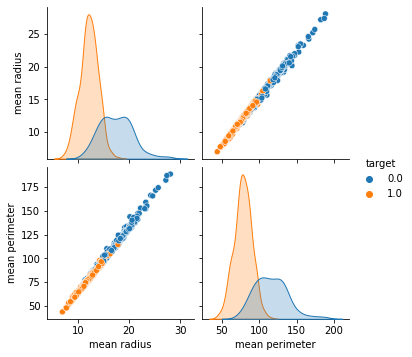

In [6]:
sns.pairplot(cancer_data,hue='target',vars=['mean radius','mean perimeter'])

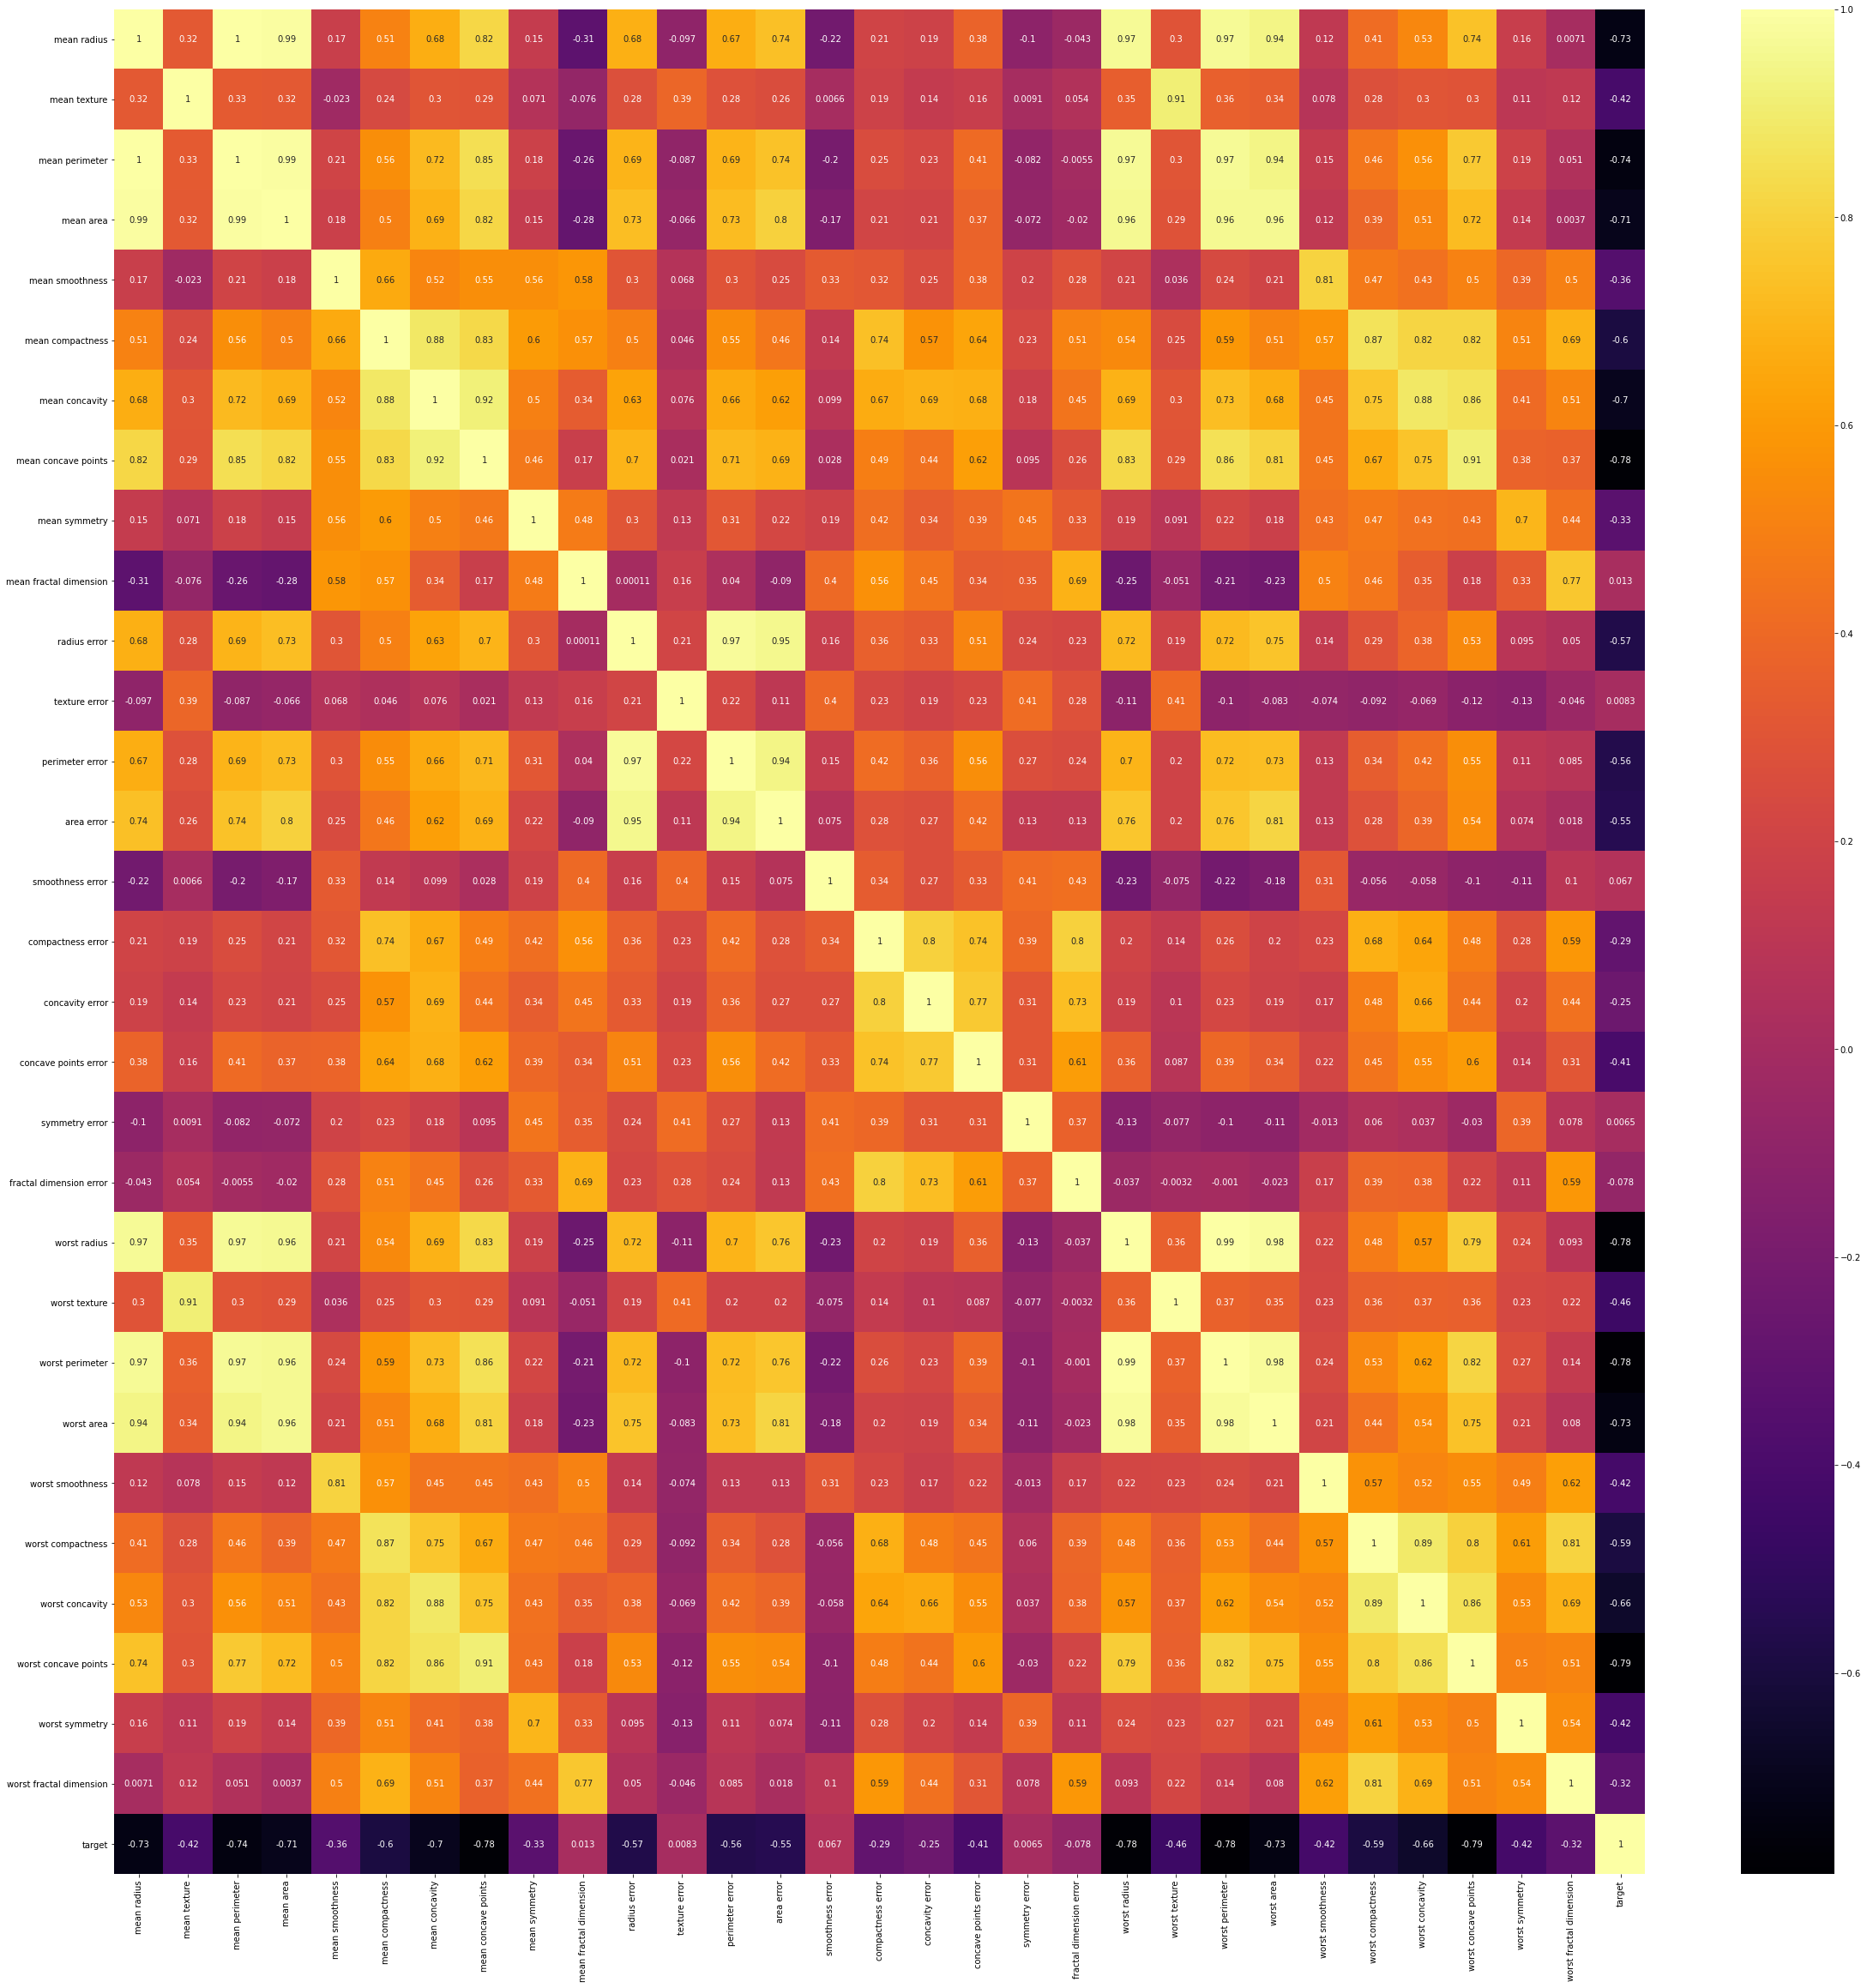

In [7]:
plt.figure(figsize =(40,40))
sns.heatmap(cancer_data.corr(),annot=True,cmap='inferno')

In [8]:
x=cancer_data.drop(['target'],axis=1)

In [9]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
y=cancer_data['target']

In [11]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [13]:
x_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
161,19.19,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,0.05176,1.0000,0.6336,6.971,119.30,0.009406,0.03055,0.04344,0.02794,0.03156,0.003362,22.03,17.81,146.60,1495.0,0.1124,0.2016,0.2264,0.17770,0.2443,0.06251
386,12.21,14.09,78.78,462.0,0.08108,0.07823,0.06839,0.02534,0.1646,0.06154,0.2666,0.8309,2.097,19.96,0.004405,0.03026,0.04344,0.01087,0.01921,0.004622,13.13,19.29,87.65,529.9,0.1026,0.2431,0.3076,0.09140,0.2677,0.08824
369,22.01,21.90,147.20,1482.0,0.10630,0.19540,0.24480,0.15010,0.1824,0.06140,1.0080,0.6999,7.561,130.20,0.003978,0.02821,0.03576,0.01471,0.01518,0.003796,27.66,25.80,195.00,2227.0,0.1294,0.3885,0.4756,0.24320,0.2741,0.08574
558,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,0.06147,0.2254,1.1080,2.224,19.54,0.004242,0.04639,0.06578,0.01606,0.01638,0.004406,15.48,27.27,105.90,733.5,0.1026,0.3171,0.3662,0.11050,0.2258,0.08004
124,13.37,16.39,86.10,553.5,0.07115,0.07325,0.08092,0.02800,0.1422,0.05823,0.1639,1.1400,1.223,14.66,0.005919,0.03270,0.04957,0.01038,0.01208,0.004076,14.26,22.75,91.99,632.1,0.1025,0.2531,0.3308,0.08978,0.2048,0.07628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,10.48,14.98,67.49,333.6,0.09816,0.10130,0.06335,0.02218,0.1925,0.06915,0.3276,1.1270,2.564,20.77,0.007364,0.03867,0.05263,0.01264,0.02161,0.004830,12.13,21.57,81.41,440.4,0.1327,0.2996,0.2939,0.09310,0.3020,0.09646
92,13.27,14.76,84.74,551.7,0.07355,0.05055,0.03261,0.02648,0.1386,0.05318,0.4057,1.1530,2.701,36.35,0.004481,0.01038,0.01358,0.01082,0.01069,0.001435,16.36,22.35,104.50,830.6,0.1006,0.1238,0.1350,0.10010,0.2027,0.06206
62,14.25,22.15,96.42,645.7,0.10490,0.20080,0.21350,0.08653,0.1949,0.07292,0.7036,1.2680,5.373,60.78,0.009407,0.07056,0.06899,0.01848,0.01700,0.006113,17.67,29.51,119.10,959.5,0.1640,0.6247,0.6922,0.17850,0.2844,0.11320
118,15.78,22.91,105.70,782.6,0.11550,0.17520,0.21330,0.09479,0.2096,0.07331,0.5520,1.0720,3.598,58.63,0.008699,0.03976,0.05950,0.01390,0.01495,0.005984,20.19,30.50,130.30,1272.0,0.1855,0.4925,0.7356,0.20340,0.3274,0.12520


In [14]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
model=SVC()

In [16]:
min_train =x_train.min()
range_train=(x_train-min_train).max()
x_train_scale=(x_train-min_train)/range_train

In [17]:
min_test =x_test.min()
range_test=(x_test-min_test).max()
x_test_scale=(x_test-min_test)/range_test

In [18]:
x_test_scale

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
161,0.571889,0.258586,0.551742,0.415423,0.228534,0.366927,0.279784,0.530280,0.455214,0.026985,0.362955,0.050330,0.344101,0.210120,0.346926,0.203812,0.362907,0.811973,0.467306,0.144915,0.482568,0.175578,0.460658,0.312279,0.195209,0.171408,0.193504,0.610653,0.243611,0.063434
386,0.208801,0.165152,0.200237,0.113131,0.169408,0.205879,0.160389,0.139002,0.391711,0.243309,0.060945,0.107764,0.070375,0.024576,0.082770,0.201610,0.362907,0.315897,0.191698,0.218923,0.153863,0.224422,0.156698,0.071713,0.123640,0.218442,0.262906,0.314089,0.308611,0.356988
369,0.718581,0.559596,0.706339,0.556783,0.423872,0.674465,0.574109,0.823368,0.510695,0.240212,0.366249,0.069630,0.377236,0.230479,0.060216,0.186043,0.298747,0.427492,0.101763,0.170406,0.690501,0.439274,0.710220,0.494741,0.319360,0.383231,0.406496,0.835739,0.326389,0.328465
558,0.332605,0.598990,0.330498,0.197991,0.206235,0.424915,0.241323,0.204937,0.263369,0.241761,0.043980,0.188426,0.077507,0.023792,0.074160,0.324094,0.549541,0.466725,0.128543,0.206235,0.240656,0.487789,0.250799,0.122464,0.123640,0.302310,0.312991,0.379725,0.192222,0.263434
124,0.269143,0.281313,0.254383,0.152929,0.069216,0.185963,0.189775,0.153593,0.241979,0.170095,0.018654,0.197741,0.021290,0.014677,0.162740,0.220138,0.414119,0.301656,0.032582,0.186852,0.195598,0.338614,0.179076,0.097188,0.122910,0.229775,0.282735,0.308522,0.133889,0.220536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,0.118810,0.210101,0.116725,0.057283,0.341741,0.298140,0.148569,0.121668,0.578209,0.411635,0.086065,0.193957,0.096602,0.026089,0.239066,0.265472,0.439683,0.367335,0.245258,0.231140,0.116930,0.299670,0.124523,0.049404,0.343460,0.282476,0.251197,0.319931,0.403889,0.450770
92,0.263941,0.198990,0.244323,0.152146,0.093432,0.095181,0.076477,0.145255,0.217914,0.058394,0.118226,0.201525,0.104296,0.055189,0.086784,0.050649,0.113450,0.314443,0.001562,0.031729,0.273157,0.325413,0.243580,0.146667,0.109034,0.083233,0.115385,0.343986,0.128056,0.058300
62,0.314919,0.572222,0.330720,0.193032,0.409747,0.696061,0.500704,0.474657,0.594251,0.495023,0.240899,0.235001,0.254357,0.100818,0.346979,0.507632,0.576358,0.537053,0.142379,0.306499,0.321539,0.561716,0.318862,0.178798,0.572044,0.650928,0.591624,0.613402,0.355000,0.641757
118,0.394507,0.610606,0.399364,0.252577,0.516699,0.593681,0.500235,0.519967,0.692513,0.503650,0.178471,0.177947,0.154672,0.096803,0.309582,0.273749,0.497076,0.403952,0.096630,0.298922,0.414611,0.594389,0.376611,0.256693,0.729059,0.501099,0.628718,0.698969,0.474444,0.778665


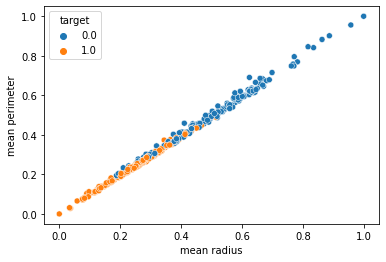

In [19]:
sns.scatterplot(x=x_train_scale['mean radius'],y=x_train_scale['mean perimeter'],hue=y_train)

In [21]:
param_grid = {'C': [0.1,1,5,10,15,18,20,25],'gamma':[0.1,1,0.01,0.2,0.02,0.5,0.3,0.03],'kernel':['rbf']}

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
grid = GridSearchCV(model,param_grid,refit=True,verbose=4)

In [26]:
grid.fit(x_train_scale,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.912, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.912, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.945, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.868, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.901, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.978, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.2, kernel=rbf, score=0.956, total=   0.0s
[CV] C=0.1, gamma=0.2, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.2, kernel=rbf, score=0.967, total=   0.0s
[CV] C=0.1, gamma=0.2, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.2, kernel=rbf, score=0.967, total=   0.0s
[CV] C=0.1, gamma=0.2, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.2, kernel=rbf, score=0.901, total=   0.0s
[CV] C=0.1, gamma=0.2, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.2, kernel=rbf, score=0.901, total=   0.0s
[CV] C=0.1, gamma=0.02, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.02, kernel=rbf, score=0.615, total=   0.0s
[CV] C=0.1, gamma=0.02, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.02, kernel=rbf, score=0.615, total=   0.0s
[CV] C=0.1, gamma=0.02, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    2.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 5, 10, 15, 18, 20, 25],
                         'gamma': [0.1, 1, 0.01, 0.2, 0.02, 0.5, 0.3, 0.03],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [27]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [28]:
pred=grid.predict(x_test_scale)

In [29]:
conf =confusion_matrix(y_test,pred)

In [30]:
conf

array([[38,  2],
       [ 3, 71]])

In [31]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94        40
         1.0       0.97      0.96      0.97        74

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



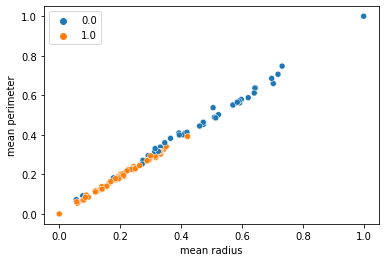

In [32]:
sns.scatterplot(x=x_test_scale['mean radius'],y=x_test_scale['mean perimeter'],hue=pred)

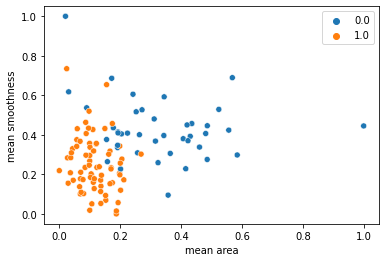

In [33]:
sns.scatterplot(x=x_test_scale['mean area'],y=x_test_scale['mean smoothness'],hue=pred)

**Fin.**